# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

# Load Data

In [2]:
data = pd.read_csv('Years_of_Experience.csv')

In [3]:
data

,Unnamed: 0,YearsExperience,Salary
0,0,1.1,39343
1,1,1.3,46205
2,2,1.5,37731
3,3,2.0,43525
4,4,2.2,39891
5,5,2.9,56642
6,6,3.0,60150
7,7,3.2,54445
8,8,3.2,64445
9,9,3.7,57189


# Delete the unnamed column

In [4]:
data = data.drop("Unnamed: 0", axis=1)
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Check for Null Values

In [6]:
data.isnull().values.any()

False

In [7]:
data.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


# CREATE REGRESSION

# Declare the dependent and the independent variables

In [8]:
y = data['Salary']
x = data['YearsExperience']

In [9]:
x.shape

(30,)

In [10]:
y.shape

(30,)

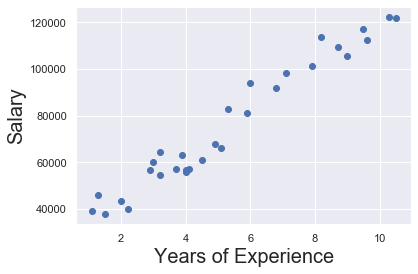

In [23]:
plt.scatter(x,y)
plt.xlabel('Years of Experience',fontsize=20)
plt.ylabel('Salary',fontsize=20)
plt.show()

# Transform/Reshape to 2D Matrix

In [12]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(30, 1)

# Regression

In [13]:
reg = LinearRegression()
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Calculate the R-squared

In [14]:
reg.score(x_matrix,y)

0.9569566641435084

# Find the intercept

In [15]:
reg.intercept_

25792.20019866871

# Find the coefficients


In [16]:
reg.coef_

array([9449.96232146])

# Making predictions

Find salary for an individual with 8 years experience.


In [18]:
reg.predict(([[8.0]]))

array([101391.89877031])

# Predicting for a number of years
Find salary for an individuals with varying years experience.

In [19]:
new_data = pd.DataFrame(data=[8.0,9.0,10.0,15.0,20.0,30.0,35.0],columns=['YearsExperience'])
new_data

,YearsExperience
0,8.0
1,9.0
2,10.0
3,15.0
4,20.0
5,30.0
6,35.0


In [20]:
reg.predict(new_data)

array([101391.89877031, 110841.86109176, 120291.82341322, 167541.63502049,
       214791.44662777, 309291.06984232, 356540.8814496 ])

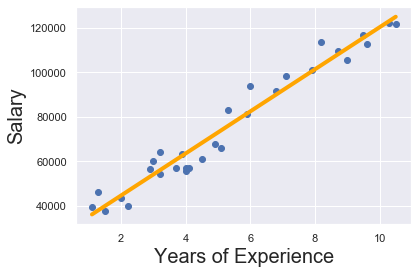

In [22]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
#yhat = 9449.96*x + 25792.20
fig = plt.plot(x,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Years of Experience', fontsize = 20)
plt.ylabel('Salary', fontsize = 20)
plt.show()